In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [39]:
totDF = pd.read_csv('../data/raw/totSampDF18.csv')
totDF = totDF.drop(totDF.columns[0],axis=1)#.reset_index()
totClean = pd.read_csv('../data/raw/Cleaned_data_set.csv')
totClean = totClean.drop(totClean.columns[0],axis=1)#.reset_index()

In [ ]:
births['admit_NICU'] = births['admit_NICU'].replace(' ', 'U')

In [29]:
totDF['mothers_bmi'] = pd.to_numeric(totDF['mothers_bmi'], errors = 'coerce')
totClean['mothers_bmi'] = pd.to_numeric(totClean['mothers_bmi'], errors = 'coerce')
totDF['mother_bmirecode'] = pd.cut(totDF['mothers_bmi'],[19.0, 25.0,30.0,35.0,40.0,90.0], right = False)
totClean['mother_bmirecode'] = pd.cut(totClean['mothers_bmi'],[19.0, 25.0,30.0,35.0,40.0,90.0], right = False)

In [38]:
val_check(totDF,'mothers_bmi_recode')

Value counts of mothers_bmi_recode 
 2.0    170956
3.0    101815
4.0     56469
5.0     27423
6.0     19513
1.0     13241
9.0     10583
Name: mothers_bmi_recode, dtype: int64
Value counts of mothers_bmi_recode by year 
 birth_year  mothers_bmi_recode
2016.0      2.0                   86471
            3.0                   50674
            4.0                   27798
            5.0                   13173
            6.0                    9689
            1.0                    6652
            9.0                    5543
2017.0      2.0                   84485
            3.0                   51141
            4.0                   28671
            5.0                   14250
            6.0                    9824
            1.0                    6589
            9.0                    5040
Name: mothers_bmi_recode, dtype: int64


In [32]:
print(totDF['mothers_bmi_recode'].value_counts())
print(totDF['mothers_bmi_recode'].count())
print(totClean['mothers_bmi_recode'].value_counts())
print(totClean['mothers_bmi_recode'].count())

2.0    170956
3.0    101815
4.0     56469
5.0     27423
6.0     19513
1.0     13241
9.0     10583
Name: mothers_bmi_recode, dtype: int64
400000
9    610583
2    170956
3    101815
4     56469
5     27423
6     19513
1     13241
Name: mothers_bmi_recode, dtype: int64
1000000


In [35]:
print(totDF['mothers_bmi'].value_counts())
print(totDF['mothers_bmi'].count())
print(totClean['mothers_bmi'].value_counts())
print(totClean['mothers_bmi'].count())

99.9    28805
26.6    17487
28.3    15101
23.0    12982
22.3    12690
        ...  
69.7        1
65.1        1
66.7        1
65.0        1
68.6        1
Name: mothers_bmi, Length: 554, dtype: int64
989407
99.9    39398
26.6    17487
28.3    15101
23.0    12982
22.3    12690
        ...  
69.7        1
65.1        1
66.7        1
65.0        1
68.6        1
Name: mothers_bmi, Length: 554, dtype: int64
1000000


### Values to do analysis on

 Mom age
 
 Mom’s age to first baby
 
 Multiple Births
 
 Plurality
 
 BMI / Mom’s weight / weight gain M&C
 
 previous children - if prior_living_births, prior_dead_births, prior_terminations
 
 mean of mothers age vs mean of first child birthed

#### Only include 2014-2017

In [ ]:
totDF['mothers_bmi_recode']

In [279]:
dfNo13 = totDF.loc[totDF['birth_year'] != 2013.0]
dfNo13 = dfNo13.drop(totDF.columns[0:2],axis=1)
dfNo13.drop(4933,axis=0,inplace=True)
dfNo13

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,weight_gain,weight_gain_reporting,pre_preg_diab_reporting,gest_diab_reporting,pre_preg_hypten_reporting,gest_hypten_reporting,hypten_ecl_reporting,prev_preterm_birth_reporting,is_first_child,mothers_age_groups
200000,2014.0,9.0,1101,2.0,1,,34.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,30-39
200001,2014.0,9.0,940,2.0,1,,22.0,1.0,1.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,20-29
200002,2014.0,11.0,1843,1.0,1,,38.0,2.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,30-39
200003,2014.0,1.0,734,4.0,1,,29.0,1.0,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,20-29
200004,2014.0,7.0,1752,4.0,1,,28.0,1.0,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017.0,10.0,752,3.0,1,,28.0,1,1,1,...,30.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False,20-29
999996,2017.0,6.0,652,6.0,1,,20.0,1,1,1,...,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False,12-19
999997,2017.0,1.0,1102,7.0,1,,24.0,2,1,1,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False,20-29
999998,2017.0,12.0,1332,3.0,1,,33.0,1,2,2,...,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False,30-39


In [14]:
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return

In [36]:
def val_check(data_frame, column_name = str):
    df = pd.DataFrame(data_frame)
    col = column_name
    print( "Value counts of %s \n" %(col), df[col].value_counts())
    print("Value counts of %s by year \n" %(col), df.groupby(['birth_year'])[col].value_counts())

In [282]:
def clean_col (df,groups):
    df = df.mask(df == ' ')

    numerics = ['int16', 'int32', 'int64']
    if df[groups].dtypes == numerics:
        df[groups] = list(map(lambda g: df[g].astype(float),groups))        
    return df

In [7]:
totDF['mothers_age'].value_counts()
totDF.plot()

29.0    62148
30.0    62040
31.0    60902
28.0    60551
27.0    58275
32.0    57239
26.0    55667
25.0    52809
33.0    52572
24.0    49267
34.0    47075
23.0    45499
22.0    41938
35.0    41114
21.0    36802
36.0    34269
20.0    32124
37.0    27026
19.0    24990
38.0    20811
39.0    15950
18.0    14958
40.0    11410
17.0     8124
41.0     7915
42.0     5053
16.0     4128
43.0     3036
44.0     1799
15.0     1669
45.0     1032
46.0      489
14.0      461
47.0      282
50.0      183
48.0      173
49.0      118
13.0       85
12.0       17
Name: mothers_age, dtype: int64

#### Create a new feature that for mothers first child

In [15]:
totDF['is_first_child'] = (totDF['prior_living_births']+totDF['prior_dead_births']+totDF['prior_terminations']) <= 0

#### Bool mask
Only include rows where it is the mother's first child


In [16]:
%time first_child = totDF.mask(totDF['is_first_child'] == False)
# print(first_child['mothers_age_groups'].value_counts())
# print(totDF['mothers_age_groups'].value_counts())

Wall time: 34.3 s


#### Create a new feature of mothers age in a range

In [8]:
totDF['mothers_age_groups']= pd.cut(totDF['mothers_age'], 4, labels = ['12-19', '20-29', '30-39','40-50'])

In [23]:
totDF['plurality']#.value_counts()

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
999995    1.0
999996    1.0
999997    1.0
999998    1.0
999999    1.0
Name: plurality, Length: 1000000, dtype: float64

In [19]:
totDF.groupby('plurality')['birth_year'].value_counts()

plurality  birth_year
1.0        2018.0        193296
           2015.0        193111
           2014.0        193055
           2016.0        193050
           2017.0        193025
2.0        2017.0          6774
           2014.0          6736
           2016.0          6724
           2015.0          6677
           2018.0          6541
3.0        2016.0           214
           2014.0           200
           2015.0           197
           2017.0           195
           2018.0           158
4.0        2015.0            14
           2016.0            11
           2014.0             7
           2017.0             5
           2018.0             5
5.0        2014.0             2
           2015.0             1
           2016.0             1
           2017.0             1
Name: birth_year, dtype: int64

### Time Series Graphs

<Figure size 1440x1440 with 0 Axes>

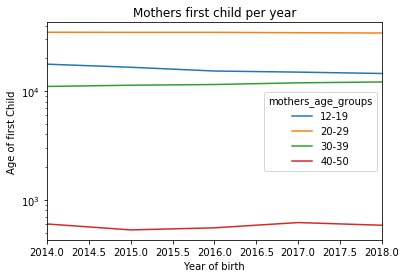

In [17]:
plot_gpYR(first_child,'mothers_age_groups','Year of birth',
          'Age of first Child','Mothers first child per year')

<Figure size 1440x1440 with 0 Axes>

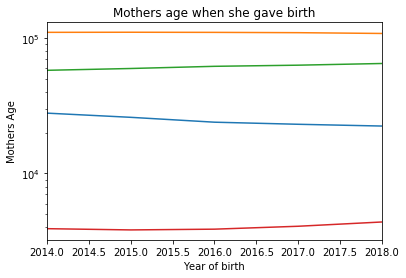

In [11]:
plot_gpYR(totDF,'mothers_age_groups','Year of birth',
        'Mothers Age','Mothers age when she gave birth')

<Figure size 1440x1440 with 0 Axes>

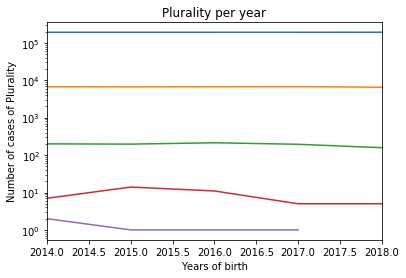

In [12]:
plot_gpYR(totDF,'plurality','Years of birth',
          'Number of cases of Plurality', 'Plurality per year')

<Figure size 1440x1440 with 0 Axes>

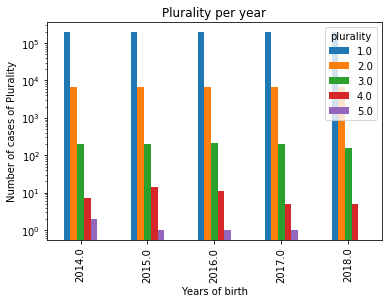

In [18]:
plot_gpYR(totDF,'plurality','Years of birth',
          'Number of cases of Plurality','Plurality per year',kind='bar')